Holistic Modified & EGO Unmodified & Energy Normalized & Time Not Normalized & Non Pareto Method & Filtered & Multiple Survival Proabilites - Activity-Location-new - 12 Combos - With Alpha-Beta Condition
Parameters: Slack = 0.1 Scale = 10 Lower Range = 0 Upper Range = 1.1 Steps = 0.1
Distribution of Time Periods


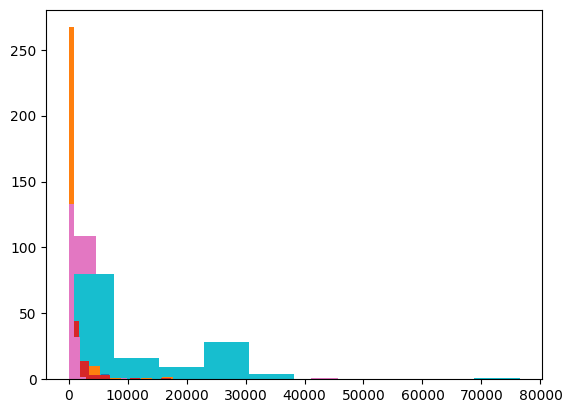

Distribution of Time Periods


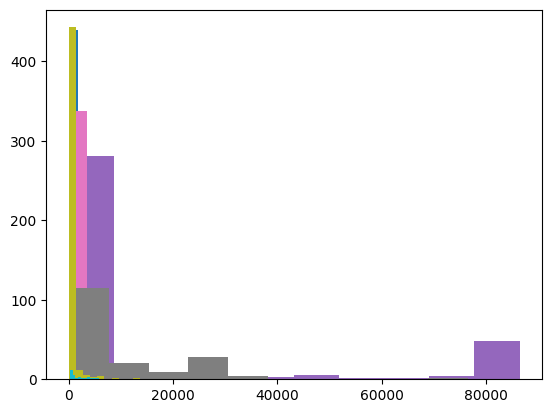

Distribution of Time Periods


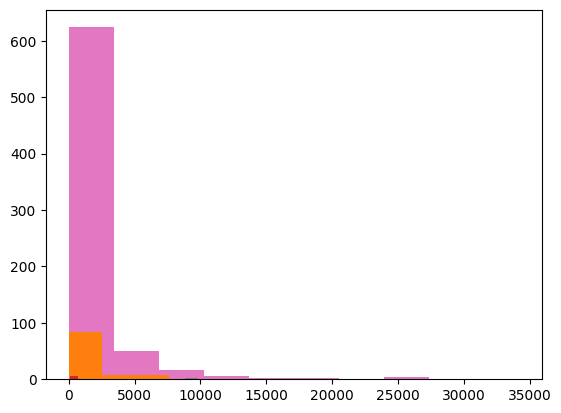

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
                 Discrete survival probability
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

//////////////////Combo 1///////////////
State 1: walk - State 2: Irani OXY Engineering Complex - State 3: Art & Entertainment


100%|██████████| 55/55 [00:01<00:00, 29.53it/s]
/Users/mayar/opt/anaconda3/envs/scl_rf/lib/python3.12/site-packages/kneed/knee_locator.py:225: RuntimeWarning: invalid value encountered in divide
  return (a - min(a)) / (max(a) - min(a))


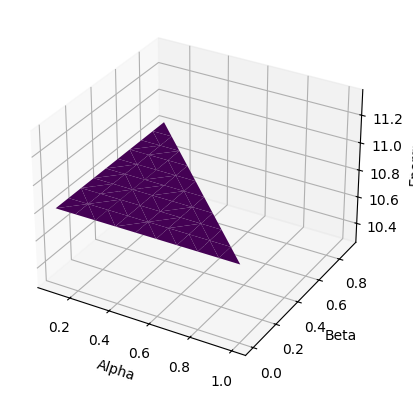

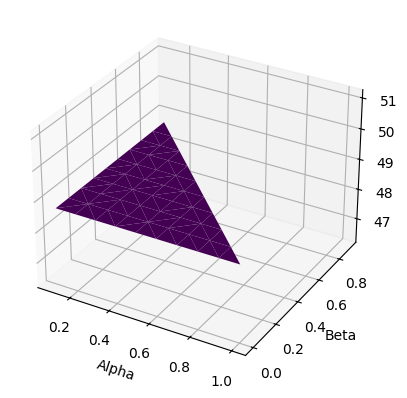

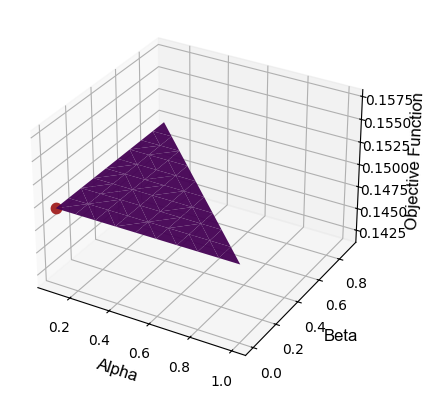

Pareto Point for Alfa =  0.1  and Beta =  0.0


/Users/mayar/Desktop/MIT/Research_Fellow/ENERGY_SENSING/CODE/PYTHON/Util.py:135: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


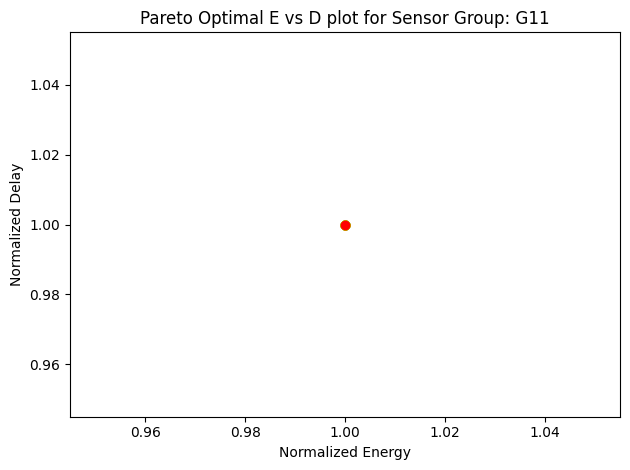

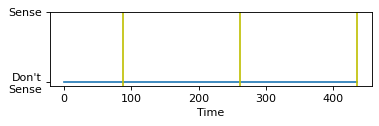

100%|██████████| 55/55 [00:02<00:00, 20.81it/s]
/Users/mayar/opt/anaconda3/envs/scl_rf/lib/python3.12/site-packages/kneed/knee_locator.py:225: RuntimeWarning: invalid value encountered in divide
  return (a - min(a)) / (max(a) - min(a))


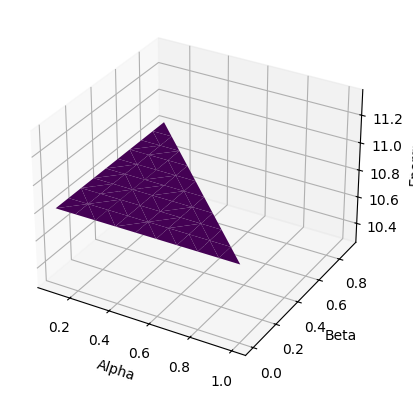

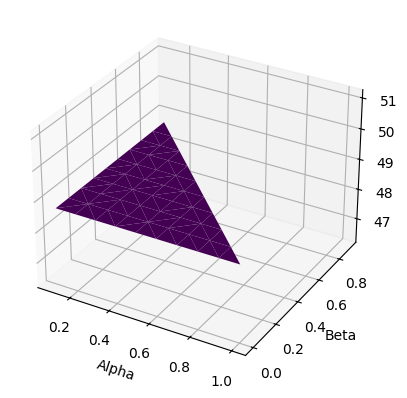

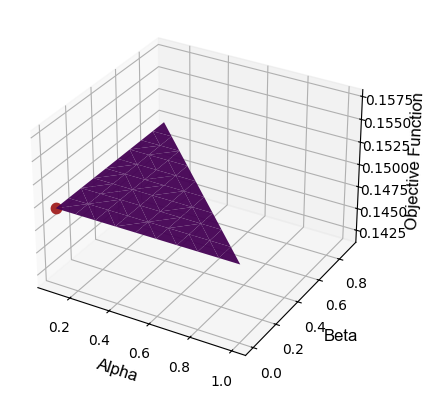

Pareto Point for Alfa =  0.1  and Beta =  0.0


/Users/mayar/Desktop/MIT/Research_Fellow/ENERGY_SENSING/CODE/PYTHON/Util.py:135: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


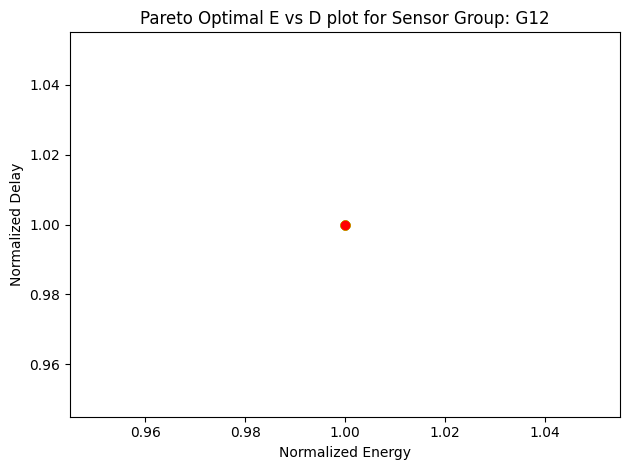

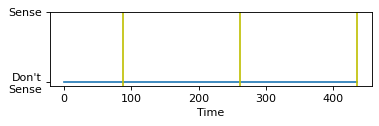

100%|██████████| 55/55 [00:00<00:00, 100.40it/s]
/Users/mayar/opt/anaconda3/envs/scl_rf/lib/python3.12/site-packages/kneed/knee_locator.py:225: RuntimeWarning: invalid value encountered in divide
  return (a - min(a)) / (max(a) - min(a))


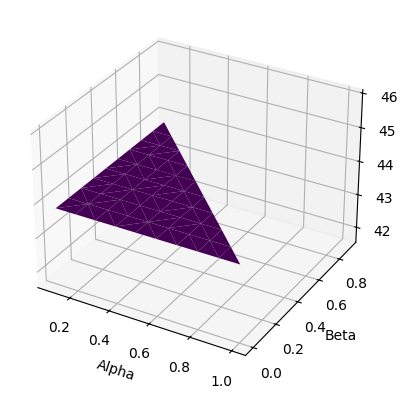

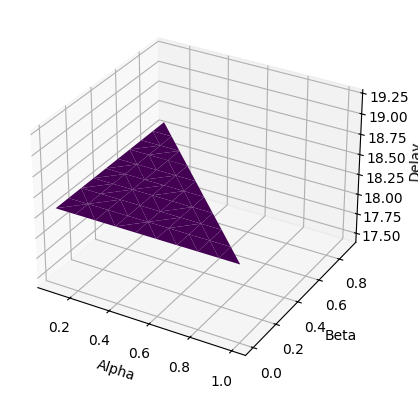

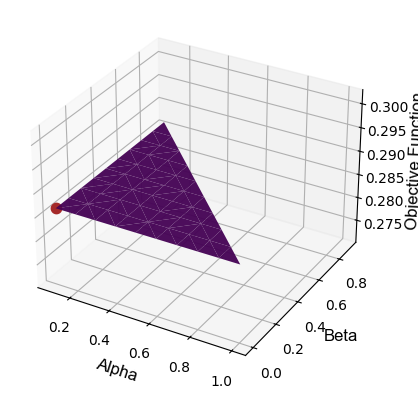

Pareto Point for Alfa =  0.1  and Beta =  0.0


/Users/mayar/Desktop/MIT/Research_Fellow/ENERGY_SENSING/CODE/PYTHON/Util.py:135: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


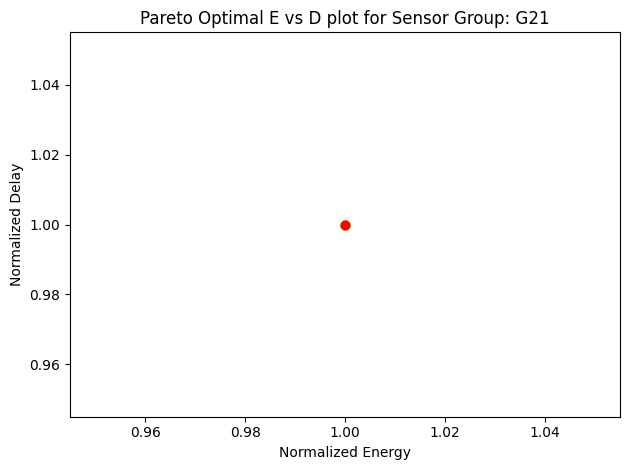

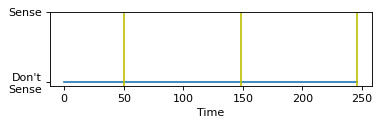

100%|██████████| 55/55 [00:00<00:00, 107.07it/s]
/Users/mayar/opt/anaconda3/envs/scl_rf/lib/python3.12/site-packages/kneed/knee_locator.py:225: RuntimeWarning: invalid value encountered in divide
  return (a - min(a)) / (max(a) - min(a))


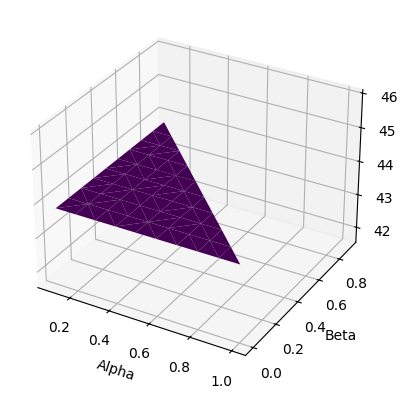

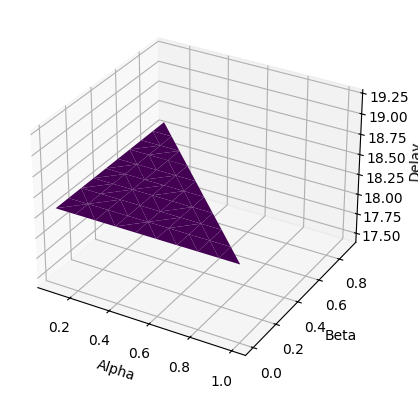

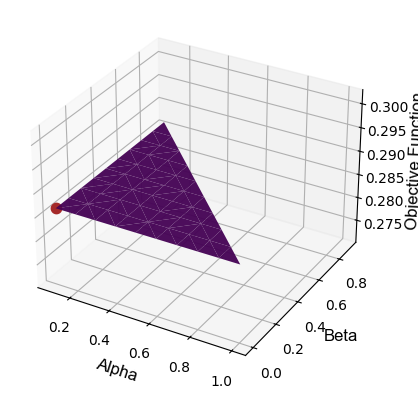

Pareto Point for Alfa =  0.1  and Beta =  0.0


/Users/mayar/Desktop/MIT/Research_Fellow/ENERGY_SENSING/CODE/PYTHON/Util.py:135: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


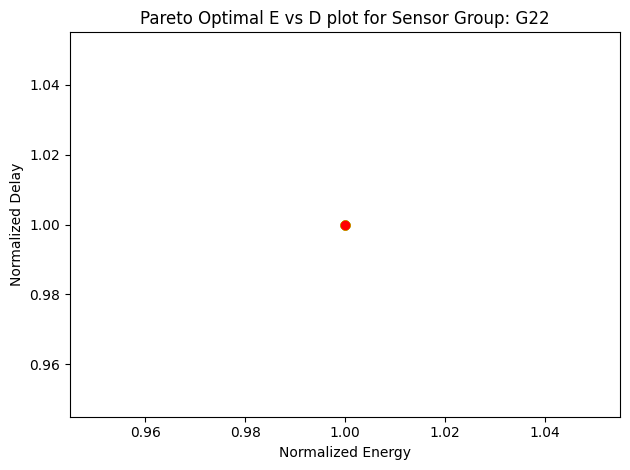

KeyboardInterrupt: 

In [12]:

import matplotlib.pyplot as plt
from Analysis import Analysis
from Util import Util
from Preprocessing import Preprocessing
import sys
from statistics import mean, stdev
from copy import deepcopy
import numpy as np

sys.setrecursionlimit(100000000)

Ana = Analysis

# Comparison Parameters 

Holistic_Modified = True #Toggles the use of the new behavioral model (several time limits) with EGO approach
EGO_Modified = False #Toggles the use of the new behavioral model (several time limits) with EGO approach
Filter_Sych_Sched =True #Toggles removal of redundant sensor triggers when synchronizing schedules
Test_Different_Survival_Probabilities = True #Toggles the experiment testing different survival probabilities

# Different experiment setups not used in paper

Context = 'new' #specifies which contexts to select from, options are 'new' and 'health'
Energy_Normalized = True #normalizes the energy consumption value by the maximum value
Time_Normalized = False #normalizes the time passed value by the maximum value
Pareto = False #applies a different function to obtain the pareto optimal combination of alpha and beta
Lower_ab_range = 0 #lower bound for alpha and beta values search
Upper_ab_range = 1.1 #upper bound for alpha and beta values search
ab_range_steps = 0.1 #step size for alpha and beta values search
Slack = 0.1 #parameter influeincing the curvature of the survival probabitlty value
Scale = 10 #scales the length of the sensing schedules (Divided by scale)
     
def Onto_reader(Model_1,Times_1,Model_2,Times_2,Model_3,Times_3, Modified, Normalized,T_Norm, Pareto, Resolution, Lower, Upper, Slack, Scale, Surv_Prob_Type, Context):
    """ Experiments' Context Recongition Model Knoweldge Base """
    if Context == 'new':
    
        Activity_Group1={'Name': 'G11', 'Context':'Activity', 'Sensor':['Acc','Gyro','Mic'],'Energy':[0.3,0.2,0.156],'Accuracy':[0.83], 'Model':Model_3,'Times':Times_3, 'Max Schedule': max(Model_3) if isinstance(Model_3,list) else Model_3, 'Max Energy': max(sum([0.3,0.2,0.156]),sum([0.3,0.1])), 'Min Energy': min(sum([0.3,0.2,0.156]),sum([0.3,0.1])) }
                
        Activity_Group2={'Name': 'G12','Context':'Activity','Sensor':['Acc','BLE'],'Energy':[0.3,0.1],'Accuracy':[0.89], 'Model':Model_3,'Times':Times_3, 'Max Schedule':max(Model_3) if isinstance(Model_3,list) else Model_3, 'Max Energy': max(sum([0.3,0.2,0.156]),sum([0.3,0.1])), 'Min Energy': min(sum([0.3,0.2,0.156]),sum([0.3,0.1])) }
        
        Location_Group1={'Name': 'G21','Context':'Location','Sensor':['BLE', 'Wifi'],'Energy':[0.1,0.25],'Accuracy':[0.89], 'Model':Model_2,'Times':Times_2, 'Max Schedule':max(Model_2) if isinstance(Model_2,list) else Model_2, 'Max Energy': max(sum([0.1,0.25]),sum([0.3,0.1,0.05,0.17,0.22])), 'Min Energy': min(sum([0.1,0.25]),sum([0.3,0.1,0.05,0.17,0.22])) }
        
        Location_Group2={'Name': 'G22','Context':'Location','Sensor':['Acc','GSM','Proxi','Light','Mag'],'Energy':[0.3,0.1,0.05,0.17,0.22],'Accuracy':[0.78], 'Model':Model_2,'Times':Times_2, 'Max Schedule':max(Model_2) if isinstance(Model_2,list) else Model_2, 'Max Energy': max(sum([0.1,0.25]),sum([0.3,0.1,0.05,0.17,0.22])), 'Min Energy': min(sum([0.1,0.25]),sum([0.3,0.1,0.05,0.17,0.22])) }
          
        Health_Group1={'Name': 'G31','Context':'Health','Sensor':['ECG','Acc','SkinTemp'],'Energy':[0.12,0.3,0.082],'Accuracy':[0.91], 'Model':Model_1,'Times':Times_1, 'Max Schedule':max(Model_1) if isinstance(Model_1,list) else Model_1, 'Max Energy': max(sum([0.12,0.3,0.182]),sum([0.12, 0.08])), 'Min Energy': min(sum([0.12,0.3,0.182]),sum([0.12, 0.08])) }
    
        Health_Group2={'Name': 'G32','Context':'Health','Sensor':['ECG', 'EDA'],'Energy':[0.12, 0.08],'Accuracy':[0.92], 'Model':Model_1,'Times':Times_1, 'Max Schedule':max(Model_1) if isinstance(Model_1,list) else Model_1, 'Max Energy': max(sum([0.12,0.3,0.182]),sum([0.12, 0.08])), 'Min Energy': min(sum([0.12,0.3,0.182]),sum([0.12, 0.08])) }

    elif Context == 'health':
    
        Activity_Group1={'Name': 'G11', 'Context':'Activity', 'Sensor':['Acc','Comp','PPG','ECG','Resp','SaO2','SkinTemp'],'Energy':[0.3,0.2,0.056,0.12,0.36,0.00216,0.182],'Accuracy':[0.86], 'Model':Model_3,'Times':Times_3, 'Max Schedule': max(Model_3) if isinstance(Model_3,list) else Model_3, 'Max Energy': max(sum([0.3,0.2,0.056,0.12,0.36,0.00216,0.182]),0.3), 'Min Energy': min(sum([0.3,0.2,0.056,0.12,0.36,0.00216,0.182]),0.3) }
                
        Activity_Group2={'Name': 'G12','Context':'Activity','Sensor':['Acc'],'Energy':[0.3],'Accuracy':[0.8], 'Model':Model_3,'Times':Times_3, 'Max Schedule':max(Model_3) if isinstance(Model_3,list) else Model_3, 'Max Energy': max(sum([0.3,0.2,0.056,0.12,0.36,0.00216,0.182]),0.3), 'Min Energy': min(sum([0.3,0.2,0.056,0.12,0.36,0.00216,0.182]),0.3) }
        
        Location_Group1={'Name': 'G21','Context':'Location','Sensor':['GPS'],'Energy':[1.7],'Accuracy':[0.85], 'Model':Model_2,'Times':Times_2, 'Max Schedule':max(Model_2) if isinstance(Model_2,list) else Model_2, 'Max Energy': max(1.7,sum([0.7,0.3,0.1])), 'Min Energy': min(1.7,sum([0.7,0.3,0.1])) }
        
        Location_Group2={'Name': 'G22','Context':'Location','Sensor':['GPS', 'Acc','GSM'],'Energy':[0.7,0.3,0.1],'Accuracy':[0.71], 'Model':Model_2,'Times':Times_2, 'Max Schedule':max(Model_2) if isinstance(Model_2,list) else Model_2, 'Max Energy': max(1.7,sum([0.7,0.3,0.1])), 'Min Energy': min(1.7,sum([0.7,0.3,0.1])) }
          
        Health_Group1={'Name': 'G31','Context':'Health','Sensor':['ECG','Acc','SkinTemp'],'Energy':[0.12,0.3,0.182],'Accuracy':[0.91], 'Model':Model_1,'Times':Times_1, 'Max Schedule':max(Model_1) if isinstance(Model_1,list) else Model_1, 'Max Energy': max(sum([0.12,0.3,0.182]),0.12), 'Min Energy': min(sum([0.12,0.3,0.182]),0.12) }
    
        Health_Group2={'Name': 'G32','Context':'Health','Sensor':['ECG'],'Energy':[0.12],'Accuracy':[0.76], 'Model':Model_1,'Times':Times_1, 'Max Schedule':max(Model_1) if isinstance(Model_1,list) else Model_1, 'Max Energy': max(sum([0.12,0.3,0.182]),0.12), 'Min Energy': min(min([0.12,0.3,0.182]),0.12) }

    else:
        
        Activity_Group1={'Name': 'G11', 'Context':'Activity', 'Sensor':['Acc','Comp','PPG','ECG','Resp','SaO2','SkinTemp'],'Energy':[0.4,0.2,0.056,0.12,0.36,0.00216,0.0082],'Accuracy':[0.86], 'Model':Model_3,'Times':Times_3, 'Max Schedule':max(Model_3) if isinstance(Model_3,list) else Model_3}
                
        Activity_Group2={'Name': 'G12','Context':'Activity','Sensor':['Acc'],'Energy':[0.4],'Accuracy':[0.8], 'Model':Model_3,'Times':Times_3, 'Max Schedule':max(Model_3) if isinstance(Model_3,list) else Model_3}
        
        Location_Group1={'Name': 'G21','Context':'Location','Sensor':['GPS'],'Energy':[1.7],'Accuracy':[0.85], 'Model':Model_2,'Times':Times_2, 'Max Schedule':max(Model_2) if isinstance(Model_2,list) else Model_2}
        
        Location_Group2={'Name': 'G22','Context':'Location','Sensor':['GPS', 'Acc','GSM'],'Energy':[0.7,0.4,0.1],'Accuracy':[0.71], 'Model':Model_2,'Times':Times_2, 'Max Schedule':max(Model_2) if isinstance(Model_2,list) else Model_2}
          
        Health_Group1={'Name': 'G31','Context':'Emotion','Sensor':['EMG','PPG','GSR'],'Energy':[0.32,0.056,0.62],'Accuracy':[0.91], 'Model':Model_1,'Times':Times_1, 'Max Schedule':max(Model_1) if isinstance(Model_1,list) else Model_1}
    
        Health_Group2={'Name': 'G32','Context':'Emotion','Sensor':['ECG'],'Energy':[0.12],'Accuracy':[0.76], 'Model':Model_1,'Times':Times_1, 'Max Schedule':max(Model_1) if isinstance(Model_1,list) else Model_1}
    
    EGO_Groups = [deepcopy(Activity_Group1), deepcopy(Activity_Group2), deepcopy(Location_Group1), deepcopy(Location_Group2), deepcopy(Health_Group1), deepcopy(Health_Group2)]
    COCAMS_Groups = deepcopy(EGO_Groups)
    Energies,Accuracies=[],[]
    
    
    
    
    for Group in EGO_Groups:
        Energies.append(float(sum(Group['Energy'])))
        Accuracies.append(Group['Accuracy'][0])
    """ Fixed for maximum possible resulting difference """
    Max_Energy = max(Energies)
    Max_Acc = max(Accuracies)      
        
    for Gr in COCAMS_Groups:
        
        Distribution = []
        if Surv_Prob_Type == 'Distribution':
            ys, xs, _ = plt.hist(Gr['Times'], bins=30)
            plt.title('Distribution of time periods of state of {} context'.format(Gr['Context']))
            plt.show()
            Distribution = list(zip(ys, xs))
            Distribution = Distribution[:]
            Distribution = list(Distribution)
        
        #normalizing by max. inst
        Gr['Norm Energy'] = float(sum(Gr['Energy']))/Gr['Max Energy']
        #normalizing by max. consumption over time limits
#        Gr['Norm Energy'] = float(sum(Gr['Energy']))/(Max_Energy*Gr['Max Schedule']/Scale)
        Gr['Norm Acc'] = Gr['Accuracy'][0]/Max_Acc
        
        Util.VCAMS_Group(Util, Gr, Gr['Max Energy'], Slack, Scale, Modified, Normalized,T_Norm, Pareto, Resolution, Lower, Upper, Surv_Prob_Type, Distribution)
        if Modified == True:
            if Surv_Prob_Type == 'Distribution':
                Last_Model = max(Gr['Model'])/Scale
                Ana.Print_Schedule(Ana, Gr['Schedule'], True, 1, Last_Model)
            else:
                Models = [x/Scale for x in Gr['Model']]
                Ana.Print_Schedule(Ana, Gr['Schedule'], True, 1, Models)
        else:
            Ana.Print_Schedule(Ana, Gr['Schedule'], True, 1, Gr['Model']/Scale)
        
    C_Activity=[deepcopy(COCAMS_Groups[0]),deepcopy(COCAMS_Groups[1])]
    C_Location=[deepcopy(COCAMS_Groups[2]),deepcopy(COCAMS_Groups[3])]
    C_Health=[deepcopy(COCAMS_Groups[4]),deepcopy(COCAMS_Groups[5])]
    
    COCAMS_Groups_Set = [[deepcopy(C_Act),deepcopy(C_Loc),deepcopy(C_Hea)] for C_Act in C_Activity for C_Loc in C_Location for C_Hea in C_Health]
    
        
    Activity=[deepcopy(EGO_Groups[0]),deepcopy(EGO_Groups[1])]
    Location=[deepcopy(EGO_Groups[2]),deepcopy(EGO_Groups[3])]
    Health=[deepcopy(EGO_Groups[4]),deepcopy(EGO_Groups[5])]  
    
    EGO_Groups_Set = [[deepcopy(Act),deepcopy(Loc),deepcopy(Hea)] for Act in Activity for Loc in Location for Hea in Health]

    return EGO_Groups_Set, COCAMS_Groups_Set, Max_Energy
 


def Run_EGO(Set, Max_E, Slack, Scale, Modified, Filtered_Synch, Normalized,T_Norm, Pareto, Resolution, Lower, Upper):
    """ Gets results for EGO approach"""
    for Groups_Combinations in Set:
        Combo_Energy = Util.Find_Common_Sensors(Util, Groups_Combinations, Max_E)
        Groups_Combinations.append(Combo_Energy)  
        
   
    Best_Energy=100
    
    for Union_of_Groups in Set:            
        if Union_of_Groups[-1]<Best_Energy:
            Best_Energy = Union_of_Groups[-1]
            EGO_Result = Union_of_Groups
    
    T_Norm = False   
    for gr in range(3):
        # EGO NORM E
#        EGO_Result[gr]['Norm Energy'] = float(sum(EGO_Result[gr]['Energy']))/EGO_Result[gr]['Max Energy']
        # EGO Time stamp E
        EGO_Result[gr]['Norm Energy'] = 1
        EGO_Result[gr]['Norm Acc'] = 1
        print("Running Solver for EGO Group")
        Util.VCAMS_Group(Util, EGO_Result[gr], EGO_Result[gr]['Max Energy'], Slack, Scale, Modified, True,T_Norm, Pareto, Resolution, Lower, Upper, 'Exponential')
        if Modified == True:
            Models = [x/Scale for x in EGO_Result[gr]['Model']]
            Ana.Print_Schedule(Ana, EGO_Result[gr]['Schedule'], True, 1, Models)
        else:
            Ana.Print_Schedule(Ana, EGO_Result[gr]['Schedule'], True, 1, EGO_Result[gr]['Model']/Scale)
    T_Norm=True    
    
    Schedules_to_Synch, Models, Times_to_Merge=[], [], []
    EGO_Result.append({'Total Normalized Energy':0, 'Total Normalized Delay':0,'Total Energy':0, 'Total Delay':0, 'Total Norm Energy':0})
    if bool(EGO_Result[3]):
        for it in range(len(EGO_Result[3]['Sensor'])):
            del Models[:]
            del Schedules_to_Synch[:]
            del Times_to_Merge[:]
            GRP1=EGO_Result[3]['Group1'][it]
            GRP2=EGO_Result[3]['Group2'][it]
            for i in range(3):
                if EGO_Result[i]['Name']==GRP1 or EGO_Result[i]['Name']==GRP2:
                    Schedules_to_Synch.append(deepcopy(EGO_Result[i]['Schedule']))
                    if Modified == True:
                        Models+=EGO_Result[i]['Model']
                    else:
                        Models.append(EGO_Result[i]['Model'])
                    Times_to_Merge.append(EGO_Result[i]['Times'])
                    EGO_Result[i]['Energy'].remove(EGO_Result[3]['Energy'][it])
                    EGO_Result[i]['Sensor'].remove(EGO_Result[3]['Sensor'][it])
                    
                    # EGO NORM E
#                    EGO_Result[i]['Norm Energy'] = float(sum(EGO_Result[i]['Energy']))/EGO_Result[i]['Max Energy']            
                   # EGO Time stamp E
                    EGO_Result[gr]['Norm Energy'] = 1
                    
                    
                    if Filtered_Synch == True and len(EGO_Result[i]['Energy'])!=0:
                        EGO_Result[i]['Schedule Energy'], _ =Ana.Analyze(Ana,EGO_Result[i]['Times'], EGO_Result[i]['Model'], EGO_Result[i]['Schedule'], Modified, EGO_Result[i]['Norm Energy'], Scale)   
                        EGO_Result[i]['Normalized Energy']=float(EGO_Result[i]['Schedule Energy']/(EGO_Result[i]['Max Energy']*(EGO_Result[i]['Max Schedule']/Scale)))
                    elif Filtered_Synch == True and len(EGO_Result[i]['Energy'])==0:
                        EGO_Result[i]['Schedule Energy']=0
                        EGO_Result[i]['Normalized Energy']=0
                        
            EGO_Result[3]['Schedule'].append(Util.Synch_Schedules(Util, Schedules_to_Synch[0],Schedules_to_Synch[1], Filtered_Synch))
            EGO_Result[3]['Model'].append(deepcopy(Models))
            EGO_Result[3]['Times'].append(Times_to_Merge[0]+Times_to_Merge[1])
            Add, _ =Ana.Analyze(Ana,EGO_Result[3]['Times'][it], EGO_Result[3]['Model'][it], EGO_Result[3]['Schedule'][it], True, EGO_Result[3]['Norm Energy'][it],Scale)    
            EGO_Result[3]['Schedule Energy'].append(Add)
            if Filtered_Synch == True:
                EGO_Result[-1]['Total Normalized Energy']+=float(EGO_Result[3]['Schedule Energy'][it]/(EGO_Result[3]['Max Energy'][it]*(EGO_Result[3]['Max Schedule'][it]/Scale)))
                EGO_Result[-1]['Total Energy']+=EGO_Result[3]['Schedule Energy'][it]
                EGO_Result[-1]['Total Norm Energy']+=EGO_Result[3]['Norm Energy'][it]
    for i in range(3):
        EGO_Result[-1]['Total Energy']+=EGO_Result[i]['Schedule Energy']
        EGO_Result[-1]['Total Delay']+=EGO_Result[i]['Schedule Delay']
        EGO_Result[-1]['Total Normalized Energy']+=EGO_Result[i]['Normalized Energy']
        EGO_Result[-1]['Total Normalized Delay']+=EGO_Result[i]['Normalized Delay']
        EGO_Result[-1]['Total Norm Energy']+=EGO_Result[i]['Norm Energy']    
#    EGO_Result[-1]['Total Normalized Energy'] = EGO_Result[0]['Normalized Energy'] + EGO_Result[1]['Normalized Energy'] + EGO_Result[2]['Normalized Energy']
#    EGO_ENERGY=EGO_Result[0]['Schedule Energy']+EGO_Result[1]['Schedule Energy']+EGO_Result[2]['Schedule Energy']   
#    EGO_DELAY=EGO_Result[0]['Schedule Delay']+EGO_Result[1]['Schedule Delay']+EGO_Result[2]['Schedule Delay']
#    EGO_Result[-1]['Total Normalized Delay']= EGO_Result[0]['Normalized Delay'] + EGO_Result[1]['Normalized Delay'] + EGO_Result[2]['Normalized Delay']
    
    Obj_func= EGO_Result[-1]['Total Normalized Delay'] + EGO_Result[-1]['Total Normalized Energy'] 
    print('--------------------------EGO-------------------')
    print('Groups Selected by EGO :', EGO_Result[0]['Name'], ' & ', EGO_Result[1]['Name'], ' & ', EGO_Result[2]['Name'])
    if bool(EGO_Result[3]):
        print('Inst Energy: ', round(sum(EGO_Result[0]['Energy']) + sum(EGO_Result[1]['Energy']) + sum(EGO_Result[2]['Energy']) + sum(EGO_Result[3]['Energy']),3))
        print('Groups Schedule Energy: \n', EGO_Result[0]['Name'],' - ', EGO_Result[0]['Schedule Energy'], '\n', EGO_Result[1]['Name'],' - ', EGO_Result[1]['Schedule Energy'], '\n', EGO_Result[2]['Name'],' - ', EGO_Result[2]['Schedule Energy'], '\nCommon: ', EGO_Result[3]['Schedule Energy'])              
    else:
        print('Inst Energy: ', round(sum(EGO_Result[0]['Energy']) + sum(EGO_Result[1]['Energy']) + sum(EGO_Result[2]['Energy']),3))
        print('Groups Schedule Energy: ', EGO_Result[0]['Name'],' - ', EGO_Result[0]['Schedule Energy'], '\n', EGO_Result[1]['Name'],' - ', EGO_Result[1]['Schedule Energy'], '\n', EGO_Result[2]['Name'],' - ', EGO_Result[2]['Schedule Energy'])              
    
    print('\nNormalized Group Energy: ', round(EGO_Result[-1]['Total Norm Energy'],3))      
    
    print('\nWith Total Schedule Energy: ', EGO_Result[-1]['Total Energy'] ,' and Total Schedule Delay: ', EGO_Result[-1]['Total Delay'] , 'With objective funtion value of: ', Obj_func)
    
    print('\nGroups Schedule Delay: \n', EGO_Result[0]['Name'],' - ', EGO_Result[0]['Schedule Delay'], '\n', EGO_Result[1]['Name'],' - ', EGO_Result[1]['Schedule Delay'], '\n', EGO_Result[2]['Name'],' - ', EGO_Result[2]['Schedule Delay'])      
    print('Total Normalized Delay: ', EGO_Result[-1]['Total Normalized Delay'])
    print('------------------------------------------------------------')    
    return deepcopy(EGO_Result), deepcopy(EGO_Result[-1]['Total Energy']), deepcopy(EGO_Result[-1]['Total Delay']), Obj_func

def Run_Holistic(Set, Max_E, Slack, Scale, Modified, Filtered_Synch, EGO_Result):
    """ Gets for our approach"""        

    Schedules_to_Synch, Models, Times_to_Merge=[], [], []
    
    for Groups_Combinations in Set:
            
            _ = Util.Find_Common_Sensors(Util, Groups_Combinations, Max_E)
            Groups_Combinations.append({'Total Energy':0,'Total Delay':0, 'Total Normalized Energy':0, 'Total Normalized Delay':0,'Total Norm Energy':0})
                
            if bool(Groups_Combinations[3]):
                for it in range(len(Groups_Combinations[3]['Sensor'])):
                    del Models[:]
                    del Schedules_to_Synch[:]
                    del Times_to_Merge[:]
                    GRP1=Groups_Combinations[3]['Group1'][it]
                    GRP2=Groups_Combinations[3]['Group2'][it]
                    for i in range(3):
                        if Groups_Combinations[i]['Name']==GRP1 or Groups_Combinations[i]['Name']==GRP2:
                            Schedules_to_Synch.append(deepcopy(Groups_Combinations[i]['Schedule']))
                            if Modified == True:
                                Models+=Groups_Combinations[i]['Model']
                            else:
                                Models.append(Groups_Combinations[i]['Model'])
                            Times_to_Merge.append(Groups_Combinations[i]['Times'])
                            if Groups_Combinations[3]['Sensor'][it] in Groups_Combinations[i]['Sensor']:
                                Groups_Combinations[i]['Energy'].remove(Groups_Combinations[3]['Energy'][it])
                                Groups_Combinations[i]['Sensor'].remove(Groups_Combinations[3]['Sensor'][it])
                                Groups_Combinations[i]['Norm Energy'] = float(sum(Groups_Combinations[i]['Energy']))/Groups_Combinations[i]['Max Energy']            
                            if Filtered_Synch == True and len(Groups_Combinations[i]['Energy'])!=0:
                                Groups_Combinations[i]['Schedule Energy'], _ = Ana.Analyze(Ana,Groups_Combinations[i]['Times'], Groups_Combinations[i]['Model'], Groups_Combinations[i]['Schedule'], Modified, Groups_Combinations[i]['Norm Energy'], Scale)
                                Groups_Combinations[i]['Normalized Energy']=float(Groups_Combinations[i]['Schedule Energy']/(Groups_Combinations[i]['Max Energy'] *(Groups_Combinations[i]['Max Schedule']/Scale)))
                            elif Filtered_Synch == True and len(Groups_Combinations[i]['Energy'])==0:
                                Groups_Combinations[i]['Schedule Energy']=0
                                Groups_Combinations[i]['Normalized Energy']=0
                                
                    Groups_Combinations[3]['Schedule'].append(Util.Synch_Schedules(Util, Schedules_to_Synch[0],Schedules_to_Synch[1], Filtered_Synch))
                    Groups_Combinations[3]['Model'].append(deepcopy(Models))
                    Groups_Combinations[3]['Times'].append(Times_to_Merge[0]+Times_to_Merge[1])
                    Add, _ = Ana.Analyze(Ana,Groups_Combinations[3]['Times'][it], Groups_Combinations[3]['Model'][it], Groups_Combinations[3]['Schedule'][it], True, Groups_Combinations[3]['Norm Energy'][it], Scale)
                    Groups_Combinations[3]['Schedule Energy'].append(Add)
                    if Filtered_Synch == True:
                        Groups_Combinations[-1]['Total Energy']+=Groups_Combinations[3]['Schedule Energy'][it]
                        Groups_Combinations[-1]['Total Norm Energy']+=Groups_Combinations[3]['Norm Energy'][it]
                        Groups_Combinations[-1]['Total Normalized Energy']+=float(Groups_Combinations[3]['Schedule Energy'][it]/(Groups_Combinations[3]['Max Energy'][it]*(Groups_Combinations[3]['Max Schedule'][it]/Scale)))
                        Groups_Combinations[3]['Normalized Energy'].append(float(Groups_Combinations[3]['Schedule Energy'][it]/(Groups_Combinations[3]['Max Energy'][it]*(Groups_Combinations[3]['Max Schedule'][it]/Scale))))
            for i in range(3):
                Groups_Combinations[-1]['Total Energy']+=Groups_Combinations[i]['Schedule Energy']
                Groups_Combinations[-1]['Total Delay']+=Groups_Combinations[i]['Schedule Delay']
                Groups_Combinations[-1]['Total Normalized Energy']+=Groups_Combinations[i]['Normalized Energy']
                Groups_Combinations[-1]['Total Normalized Delay']+=Groups_Combinations[i]['Normalized Delay']
                Groups_Combinations[-1]['Total Norm Energy']+=Groups_Combinations[i]['Norm Energy']
            
#    Best_Energy=1000
#    for Union_of_Groups in Set:
#        if Union_of_Groups[-1]['Total Energy']<Best_Energy:
#            Best_Energy = Union_of_Groups[-1]['Total Energy']
#            BEST_ENERGY_Group = Union_of_Groups
#    
#    Best_Delay=100
#    for Union_of_Groups in Set:
#        if Union_of_Groups[-1]['Total Delay']<Best_Delay:
#            Best_Delay = Union_of_Groups[-1]['Total Delay']
#            BEST_DELAY_Group = Union_of_Groups
    
    print('\n----------------------HOISTIC---------------------')
    Best_OBJ=100
    Combos_Sch_Energy, Combos_Sch_Delay, Combos_Norm_Energy, Combos_Norm_Delay, Combo_Anotations = [], [], [], [], []
    
    
    
    for Union_of_Groups in Set:
        
        combi_name = "{}-{}-{}".format(Union_of_Groups[0]['Name'],Union_of_Groups[1]['Name'],Union_of_Groups[2]['Name'])
        Combo_Anotations.append(combi_name)
        
        Combo_Sch_De = Union_of_Groups[0]['Schedule Delay'] + Union_of_Groups[1]['Schedule Delay'] + Union_of_Groups[2]['Schedule Delay'] 
        Combos_Sch_Delay.append(Combo_Sch_De)
        
        Combo_Norm_De = Union_of_Groups[0]['Normalized Delay'] + Union_of_Groups[1]['Normalized Delay'] + Union_of_Groups[2]['Normalized Delay'] 
        Combos_Norm_Delay.append(Combo_Norm_De)
        
        OBJ = Union_of_Groups[-1]['Total Normalized Energy'] + Union_of_Groups[-1]['Total Normalized Delay']
        print('OBJ: ', round(OBJ,3),' for group combo ', Union_of_Groups[0]['Name'], ' & ', Union_of_Groups[1]['Name'], ' & ', Union_of_Groups[2]['Name'])
        
        if bool(Union_of_Groups[3]):
            
            Combo_Sch_En = Union_of_Groups[0]['Schedule Energy'] + Union_of_Groups[1]['Schedule Energy'] + Union_of_Groups[2]['Schedule Energy'] + sum(Union_of_Groups[3]['Schedule Energy'])
            
            Inst_Energy=sum(Union_of_Groups[0]['Energy']) + sum(Union_of_Groups[1]['Energy']) + sum(Union_of_Groups[2]['Energy']) + sum(Union_of_Groups[3]['Energy'])
            
            print('Inst Energy: ', round(Inst_Energy,3))
            print('Groups Schedule Energy: \n', Union_of_Groups[0]['Name'],' - ', Union_of_Groups[0]['Schedule Energy'], '\n', Union_of_Groups[1]['Name'],' - ', Union_of_Groups[1]['Schedule Energy'], '\n', Union_of_Groups[2]['Name'],' - ', Union_of_Groups[2]['Schedule Energy'], '\nCommon: ', Union_of_Groups[3]['Schedule Energy'])              
            print('Normalized Groups Inst Energy: \n', Union_of_Groups[0]['Name'],' - ', Union_of_Groups[0]['Norm Energy'], '\n', Union_of_Groups[1]['Name'],' - ', Union_of_Groups[1]['Norm Energy'], '\n', Union_of_Groups[2]['Name'],' - ', Union_of_Groups[2]['Norm Energy'], '\nCommon: ', Union_of_Groups[3]['Norm Energy'])      
            print('\n***Normalized Groups Schedule Energy: \n', Union_of_Groups[0]['Name'],' - ', Union_of_Groups[0]['Normalized Energy'], '\n', Union_of_Groups[1]['Name'],' - ', Union_of_Groups[1]['Normalized Energy'], '\n', Union_of_Groups[2]['Name'],' - ', Union_of_Groups[2]['Normalized Energy'])      
            if Filtered_Synch==True:
                print(' Common: ', Union_of_Groups[3]['Normalized Energy'])
                Combo_Norm_En = Union_of_Groups[0]['Normalized Energy'] + Union_of_Groups[1]['Normalized Energy'] + Union_of_Groups[2]['Normalized Energy'] + sum(Union_of_Groups[3]['Normalized Energy'])
            else:
                Combo_Norm_En = Union_of_Groups[0]['Normalized Energy'] + Union_of_Groups[1]['Normalized Energy'] + Union_of_Groups[2]['Normalized Energy'] 
        else:
            
#            Combo_Sch_En = Union_of_Groups[0]['Schedule Energy'] + Union_of_Groups[1]['Schedule Energy'] + Union_of_Groups[2]['Schedule Energy'] 
            Combo_Norm_En = Union_of_Groups[0]['Normalized Energy'] + Union_of_Groups[1]['Normalized Energy'] + Union_of_Groups[2]['Normalized Energy'] 
            Inst_Energy = sum(Union_of_Groups[0]['Energy']) + sum(Union_of_Groups[1]['Energy']) + sum(Union_of_Groups[2]['Energy'])
            
            print('Inst Energy: ', round(Inst_Energy,3))
            print('Groups Schedule Energy: \n', Union_of_Groups[0]['Name'],' - ', Union_of_Groups[0]['Schedule Energy'], '\n', Union_of_Groups[1]['Name'],' - ', Union_of_Groups[1]['Schedule Energy'], '\n', Union_of_Groups[2]['Name'],' - ', Union_of_Groups[2]['Schedule Energy']) 
            print('Normalized Groups Inst Energy: \n', Union_of_Groups[0]['Name'],' - ', Union_of_Groups[0]['Norm Energy'], '\n', Union_of_Groups[1]['Name'],' - ', Union_of_Groups[1]['Norm Energy'], '\n', Union_of_Groups[2]['Name'],' - ', Union_of_Groups[2]['Norm Energy'])                   
            print('\n***Normalized Groups Schedule Energy: \n', Union_of_Groups[0]['Name'],' - ', Union_of_Groups[0]['Normalized Energy'], '\n', Union_of_Groups[1]['Name'],' - ', Union_of_Groups[1]['Normalized Energy'], '\n', Union_of_Groups[2]['Name'],' - ', Union_of_Groups[2]['Normalized Energy'])
        
        
            
        
        Combos_Sch_Energy.append(Combo_Sch_En)
        Combos_Norm_Energy.append(Combo_Norm_En)
        print('\nTotal Normalized Group Energy: ', round(Union_of_Groups[-1]['Total Norm Energy'],3))      
                
        print('\nTotal Schedule Energy: ', Union_of_Groups[-1]['Total Energy'])
        print('Total Normalized Energy: ', Union_of_Groups[-1]['Total Normalized Energy'])
       
        print('\nTotal Schedule Delay: ', Union_of_Groups[-1]['Total Delay'])
        print('Groups Schedule Delay: \n', Union_of_Groups[0]['Name'],' - ', Union_of_Groups[0]['Schedule Delay'], '\n', Union_of_Groups[1]['Name'],' - ', Union_of_Groups[1]['Schedule Delay'], '\n', Union_of_Groups[2]['Name'],' - ', Union_of_Groups[2]['Schedule Delay'])      
        print('Total Normalized Delay: ', Union_of_Groups[-1]['Total Normalized Delay'])
        print('--------------------------------------------------------------------------------')    
        if OBJ<Best_OBJ:
            Best_OBJ = OBJ 
            BEST_Group = Union_of_Groups
 
#    Combos_Norm_Sch_Delay = [x/max(Combos_Sch_Delay) for x in Combos_Sch_Delay]
#    Combos_Norm_Sch_Energy = [x/max(Combos_Sch_Energy) for x in Combos_Sch_Energy]   
#    
#    
#    Title2 = "E vs D for All Sensor Group Combinations Normalized by Max Result"
#    EGO_New_Method_Obj, New_Method_Obj = Print_Pareto(Title2, Combo_Anotations, EGO_COMBO_NAME, Combos_Norm_Sch_Delay, Combos_Norm_Sch_Energy, True) 
    
    Title1 = "E vs D for All Sensor Group Combinations"
    _, _ = Util.Print_Pareto(Util, Title1, Combo_Anotations, EGO_Result, Combos_Norm_Delay, Combos_Norm_Energy, True) 
    
    
    print('\nBest OBJ is ', Best_OBJ)
    print('For group combo ', BEST_Group[0]['Name'], ' & ', BEST_Group[1]['Name'], ' & ', BEST_Group[2]['Name'])
    print('--------------------------------------------------------------------------------')    
    
    
    
    return deepcopy(BEST_Group), deepcopy(BEST_Group[-1]['Total Energy']), deepcopy(BEST_Group[-1]['Total Delay']), Best_OBJ


def Replace_Models(Group_Combos, Model_1, Model_2, Model_3):
    """ Fixes a bug """
    for Groups in Group_Combos:
        Groups[0]['Model']=Model_3
        Groups[1]['Model']=Model_2
        Groups[2]['Model']=Model_1
    
def Run_Comparison(C_Modified, E_Modified, Normalized, T_Norm, Pareto, Filtered, Surv_Prob, Resolution, Lower, Upper, Slack, Scale, Context):
    """ Runs Comparisons of EGO to Our Apporach based on given parameters that specify which comparison to run"""
    
    Data_Path = r"SmarterTimeTimeslots 6-6-2019.csv" 
    STD_Parameter = 0.1
    Time_Limits_Threshold = 5
            
    Preprocessor = Preprocessing(Time_Limits_Threshold, Data_Path)
    Activity_Model_Data_Old, Activity_Category_Model_Data_Old, Location_Model_Data_Old = Preprocessor.Prep_Data_Old(STD_Parameter)  
    Activity_Model_Data_New, Activity_Category_Model_Data_New, Location_Model_Data_New, Activity_Times, Activity_Category_Times, Location_Times = Preprocessor.Prep_Data_New(STD_Parameter)

    
    ACT_KEYS=['walk','eat','sleep']
    LOC_KEYS=['Irani OXY Engineering Complex','Henry Ford, Bayrut, Lebanon','Parents']
    ACT_CAT_KEYS= ['Art & Entertainment','Social','Professional Life']
    
    
    
    All_HOL_GROUPS={}
    if Surv_Prob == False:
        HOL_GROUPS={'BEST-GROUP':[],'Energy':[],'Delay':[], 'Objective Function':[]}
        EGO_GROUPS={'BEST-GROUP':[],'Energy':[],'Delay':[], 'Objective Function':[]}
        count = 0     
        for i in range(2):
            for h in range(2):
                for g in range(3):
    #    i=1
    #    h=1
    #    g=0
                    count += 1                 
                    
                    if C_Modified == True:
                        """HOLISTIC NEW MODELS"""
                        Model_H1 = Activity_Model_Data_New[ACT_KEYS[i]]                    
                        Model_H2 = Location_Model_Data_New[LOC_KEYS[h]]                    
                        Model_H3 = Activity_Category_Model_Data_New[ACT_CAT_KEYS[g]]
                    else:
                        """HOLISTIC OLD MODELS"""
                        Model_H1 = Activity_Model_Data_Old[ACT_KEYS[i]]
                        Model_H2 = Location_Model_Data_Old[LOC_KEYS[h]]                    
                        Model_H3 = Activity_Category_Model_Data_Old[ACT_CAT_KEYS[g]]
                        
                    """EGO MODELS"""    
                    Model_E1 = Activity_Model_Data_Old[ACT_KEYS[i]]
                    Times_1 = Activity_Times[ACT_KEYS[i]]
                    
                    Model_E2 = Location_Model_Data_Old[LOC_KEYS[h]]
                    Times_2 = Location_Times[LOC_KEYS[h]]
                    
                    Model_E3 = Activity_Category_Model_Data_Old[ACT_CAT_KEYS[g]]
                    Times_3 = Activity_Category_Times[ACT_CAT_KEYS[g]]
                        
                    print("\n//////////////////Combo {}///////////////".format(count)) 
                    print("State 1: {} - State 2: {} - State 3: {}".format(ACT_KEYS[i],LOC_KEYS[h],ACT_CAT_KEYS[g]))
                    
                    EGO_Set_Groups, COCAMS_Set_Groups, Max_Energy= Onto_reader(Model_H1,Times_1,Model_H2,Times_2,Model_H3,Times_3, C_Modified, Normalized,T_Norm, Pareto, Resolution, Lower, Upper, Slack, Scale, 'Exponential',Context)
                    
                    if E_Modified == False:
                        Replace_Models(EGO_Set_Groups,Model_E1,Model_E2,Model_E3)
                                                                                                                            
                    EGO_GROUP, EGO_GROUP_E, EGO_GROUP_D, EGO_OBJ = Run_EGO(deepcopy(EGO_Set_Groups), Max_Energy, Slack, Scale, E_Modified, Filtered, Normalized, T_Norm, Pareto, Resolution, Lower, Upper)
                    HOL_GROUP, HOL_GROUP_E, HOL_GROUP_D, HOL_OBJ= Run_Holistic(deepcopy(COCAMS_Set_Groups), Max_Energy, Slack, Scale, C_Modified, Filtered, EGO_GROUP)
                    EGO_GROUPS['Energy'].append(EGO_GROUP_E)
                    EGO_GROUPS['Delay'].append(EGO_GROUP_D)
                    EGO_GROUPS['Objective Function'].append(EGO_OBJ)
                    EGO_GROUPS['BEST-GROUP'].append(EGO_GROUP)
                    
                    HOL_GROUPS['Energy'].append(HOL_GROUP_E)
                    HOL_GROUPS['Delay'].append(HOL_GROUP_D)
                    HOL_GROUPS['Objective Function'].append(HOL_OBJ)
                    HOL_GROUPS['BEST-GROUP'].append(HOL_GROUP)
                
                
        for Param in ['Energy','Delay','Objective Function']:
                               
            Util.Plotter(Util, Param, HOL_GROUPS, EGO_GROUPS) 
   
    elif Surv_Prob == True :
        Surv_Proba_Types = ['Discrete', 'Linear', 'Distribution', 'Exponential']
        for Surv_Proba_Type in Surv_Proba_Types:
            HOL_GROUPS={'BEST-GROUP':[],'Energy':[],'Delay':[], 'Objective Function':[]}        
            EGO_GROUPS={'BEST-GROUP':[],'Energy':[],'Delay':[], 'Objective Function':[]}
            count = 0
            print('|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')
            print("                 {} survival probability".format(Surv_Proba_Type))
            print('|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')
            for i in range(2):
                for h in range(2):
                    for g in range(3):
        #    i=1
        #    h=1
        #    g=0
                        count += 1                 
                        
                        if C_Modified == True:
                            """HOLISTIC NEW MODELS"""
                            Model_H1 = Activity_Model_Data_New[ACT_KEYS[i]]                    
                            Model_H2 = Location_Model_Data_New[LOC_KEYS[h]]                    
                            Model_H3 = Activity_Category_Model_Data_New[ACT_CAT_KEYS[g]]
                        else:
                            """HOLISTIC OLD MODELS"""
                            Model_H1 = Activity_Model_Data_Old[ACT_KEYS[i]]
                            Model_H2 = Location_Model_Data_Old[LOC_KEYS[h]]                    
                            Model_H3 = Activity_Category_Model_Data_Old[ACT_CAT_KEYS[g]]
                            
                        """EGO MODELS"""    
                        Model_E1 = Activity_Model_Data_Old[ACT_KEYS[i]]
                        Times_1 = Activity_Times[ACT_KEYS[i]]
                        
                        Model_E2 = Location_Model_Data_Old[LOC_KEYS[h]]
                        Times_2 = Location_Times[LOC_KEYS[h]]
                        
                        Model_E3 = Activity_Category_Model_Data_Old[ACT_CAT_KEYS[g]]
                        Times_3 = Activity_Category_Times[ACT_CAT_KEYS[g]]
                            
                        print("\n//////////////////Combo {}///////////////".format(count)) 
                        print("State 1: {} - State 2: {} - State 3: {}".format(ACT_KEYS[i],LOC_KEYS[h],ACT_CAT_KEYS[g]))
                        EGO_Set_Groups, COCAMS_Set_Groups, Max_Energy= Onto_reader(Model_H1,Times_1,Model_H2,Times_2,Model_H3,Times_3, C_Modified, Normalized, T_Norm, Pareto, Resolution, Lower, Upper, Slack, Scale,Surv_Proba_Type, Context)
                        
                        if E_Modified == False:
                            Replace_Models(EGO_Set_Groups,Model_E1,Model_E2,Model_E3)
                                                                                                                                
                        EGO_GROUP, EGO_GROUP_E, EGO_GROUP_D, EGO_OBJ = Run_EGO(deepcopy(EGO_Set_Groups), Max_Energy, Slack, Scale, E_Modified, Filtered, Normalized, T_Norm, Pareto, Resolution, Lower, Upper)
                        HOL_GROUP, HOL_GROUP_E, HOL_GROUP_D, HOL_OBJ= Run_Holistic(deepcopy(COCAMS_Set_Groups), Max_Energy, Slack, Scale, C_Modified, Filtered, EGO_GROUP)
                        EGO_GROUPS['Energy'].append(EGO_GROUP_E)
                        EGO_GROUPS['Delay'].append(EGO_GROUP_D)
                        EGO_GROUPS['Objective Function'].append(EGO_OBJ)
                        EGO_GROUPS['BEST-GROUP'].append(EGO_GROUP)
                        
                        HOL_GROUPS['Energy'].append(HOL_GROUP_E)
                        HOL_GROUPS['Delay'].append(HOL_GROUP_D)
                        HOL_GROUPS['Objective Function'].append(HOL_OBJ)
                        HOL_GROUPS['BEST-GROUP'].append(HOL_GROUP)                
                        
            All_HOL_GROUPS[Surv_Proba_Type]=HOL_GROUPS            
                        
                        
            for Param in ['Energy','Delay','Objective Function']:
                                   
                Util.Plotter(Util, Param, HOL_GROUPS, EGO_GROUPS) 
                
        for Param in ['Energy','Delay','Objective Function']:
            
            ind = np.arange(1)  # the x locations for the groups
            width = 0.2  # the width of the bars
            
            fig, ax = plt.subplots()
            
            rect_a = ax.bar(ind - 1.5*width, round(mean(All_HOL_GROUPS['Discrete'][Param]),3), width,yerr= stdev(All_HOL_GROUPS['Discrete'][Param]), error_kw=dict(lw=5, capsize=3, capthick=5),
                            label='Uniform')
            rect_b = ax.bar(ind - 0.5*width, round(mean(All_HOL_GROUPS['Linear'][Param]),3), width,yerr= stdev(All_HOL_GROUPS['Linear'][Param]), error_kw=dict(lw=5, capsize=3, capthick=5),
                            label='Linear')
            rect_c = ax.bar(ind + 0.5*width, round(mean(All_HOL_GROUPS['Distribution'][Param]),3), width,yerr= stdev(All_HOL_GROUPS['Distribution'][Param]), error_kw=dict(lw=5, capsize=3, capthick=5),
                            label='Distribution')
            rect_d = ax.bar(ind + 1.5*width, round(mean(All_HOL_GROUPS['Exponential'][Param]),3), width,yerr= stdev(All_HOL_GROUPS['Exponential'][Param]), error_kw=dict(lw=5, capsize=3, capthick=5),
                            label='Exponential')


            # Add some text for labels, title and custom x-axis tick labels, etc.
            ax.set_ylabel("Average {}".format(Param), fontsize=14)
            ax.set_xlabel('All States', fontsize=14)
            ax.set_xticks(ind)
            ax.set_xticklabels('-')
            if Param == 'Energy':
                ax.legend(loc="lower right", prop={'size': 12})
            else:
                ax.legend(loc="upper right", prop={'size': 12}) 
            
            Util.autolabel(Util, rect_a, "left", ax)
            Util.autolabel(Util, rect_b, "center", ax)
            Util.autolabel(Util, rect_c, "center", ax)
            Util.autolabel(Util, rect_d, "right", ax)
            
            "Box Plot Average"
            figg, axx = plt.subplots(constrained_layout=True)
            Title3 = 'Boxplots of %s - EGO vs Holistic' %Param
            axx.set_title(Title3)
            axx.boxplot([ All_HOL_GROUPS['Discrete'][Param],All_HOL_GROUPS['Linear'][Param], All_HOL_GROUPS['Distribution'][Param], All_HOL_GROUPS['Exponential'][Param]])
            axx.set_xticklabels(['Uniform','Linear','Distribution','Exponential'])
            plt.show()
    
    return 0


""" Prints out experiment setup"""
if Holistic_Modified == True:
    H_M = 'Modified'
else:
    H_M ='Unmodified'
if EGO_Modified == True:
    E_M = 'Modified'
else:
    E_M ='Unmodified'
if Energy_Normalized == True:
    E_N = 'Normalized'
else:
    E_N ='Not Normalized' 
    
if Time_Normalized == True:
    T_N = 'Normalized'
else:
    T_N ='Not Normalized'

if Pareto == True:
    P = 'Pareto Method'
else:
    P = 'Non Pareto Method'

if Filter_Sych_Sched == True:
    F_S = 'Filtered'
else:
    F_S = 'Not Filtered'
    
if Test_Different_Survival_Probabilities == True:
    S_P = 'Multiple Survival Proabilites'
else:
    S_P = 'Single Survival Probability'

print('Holistic {} & EGO {} & Energy {} & Time {} & {} & {} & {} - Activity-Location-{} - 12 Combos - With Alpha-Beta Condition'.format(H_M,E_M,E_N,T_N,P,F_S, S_P, Context))
print('Parameters: Slack = {} Scale = {} Lower Range = {} Upper Range = {} Steps = {}'.format(Slack, Scale,Lower_ab_range, Upper_ab_range, ab_range_steps))

Run_Comparison(Holistic_Modified, EGO_Modified, Energy_Normalized, Time_Normalized, Pareto, Filter_Sych_Sched, Test_Different_Survival_Probabilities, ab_range_steps, Lower_ab_range, Upper_ab_range, Slack, Scale, Context)

print('Holistic {} & EGO {} & Energy {} & Time {} & {} & {} & {} - Activity-Location-{} - 12 Combos - With Alpha-Beta Condition'.format(H_M,E_M,E_N,T_N,P,F_S, S_P, Context))
print('Parameters: Slack = {} Scale = {} Lower Range = {} Upper Range = {} Steps = {}'.format(Slack, Scale,Lower_ab_range, Upper_ab_range, ab_range_steps))

